In [46]:
import numpy as np
import pandas as pd
import sklearn

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lg = LogisticRegression()

In [327]:
pwd

u'/Share/home/chenxupeng/projects/math'

In [268]:
a= np.arange(835)
np.random.shuffle(a)

In [269]:
test_index = {}
for i in range(9):
    test_index[i] = a[83*i:83*(i+1)]
test_index[9] = a[83*9:]

In [270]:
train_index = {}
for i in range(10):
    train_index[i] = np.setxor1d(a, test_index[i])

In [271]:
all = pd.read_table('dataAll.csv',delimiter=',')

In [272]:
all = np.asarray(all)
price = all[:,8:9]


In [273]:
a = [0,8]
feature = np.delete(all,a,axis=1)

[0, 8]

In [277]:
a = {}
for i in range(26):
    a[i] = np.zeros((1, 26))
    a[i][0,i] = 1

In [278]:
m = np.array([])
for i in range(835):
    for j in range(26):
        if feature[i:i+1,9:] == j:
            m = np.concatenate((m, a[j][0]), axis=0)

In [279]:
m = m.reshape(-1,26)

In [280]:
feature = np.concatenate((feature[:,:9],m),axis = 1).astype(float)

In [282]:
feature

array([[ 11.,  18.,  16., ...,   0.,   0.,   0.],
       [  4.,  24.,   7., ...,   0.,   0.,   0.],
       [  7.,  16.,  15., ...,   0.,   0.,   0.],
       ..., 
       [  6.,  12.,   9., ...,   0.,   0.,   0.],
       [  9.,  21.,  20., ...,   0.,   0.,   0.],
       [  7.,   5.,  10., ...,   0.,   1.,   0.]])

In [283]:
price = price.ravel()

In [323]:
training_set = {}
test_set = {}
training_label = {}
test_label = {}
for i in range(10):
    training_set[i] = feature[train_index[i]]
    test_set[i] = feature[test_index[i]]
    training_label[i] = price[train_index[i]]
    test_label[i] = price[test_index[i]]

In [306]:
price.shape

(835,)

In [307]:
import sklearn
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr

In [308]:
import xgboost
from xgboost.sklearn import XGBRegressor


In [309]:
predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = XGBRegressor()
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

-0.137779023635
0.429769731939
-0.386029893465
-0.213929671322
0.616521516208
0.0853181101988
0.545690690521
-0.545996986419
-0.0768804749307
0.313126411451
average:0.062981


In [310]:
predict[1] - test_label[1]

array([0.08885955810546875, -9.200416564941406, 0.10869598388671875,
       -0.8942108154296875, -0.05390167236328125, -0.11946868896484375,
       0.5062103271484375, 0.5485687255859375, 2.8500442504882812,
       0.47219085693359375, -1.9937896728515625, 2.0514373779296875,
       0.1894073486328125, -1.6092453002929688, 0.873565673828125,
       2.3415985107421875, 2.0486526489257812, 0.31554412841796875,
       1.1690597534179688, 0.07921600341796875, -1.8397903442382812,
       0.5458755493164062, -0.00830078125, -3.9869308471679688,
       -0.48905181884765625, 0.094970703125, 2.8896102905273438,
       0.6808853149414062, -0.5124359130859375, 0.2321014404296875,
       2.807464599609375, 0.8297348022460938, 0.41506195068359375,
       -0.27954864501953125, 1.812530517578125, -5.470207214355469,
       -3.9890518188476562, 0.24515533447265625, 0.170135498046875,
       0.0062103271484375, 0.36447906494140625, 0.04769134521484375,
       -0.12596893310546875, 1.0791397094726562, -

In [311]:
MSE = {}
for i in range(10):
    MSE[i] = (abs(predict[i] - test_label[i]))**(2)

In [312]:
mse = {}
for i in range(10):
    mse[i] = (np.sum(MSE[i]))/(predict[i].shape[0])
    print mse[i]

12.3009192388
5.66630286379
15.0386648457
14.324204509
3.40798154895
8.67999838932
4.82911085767
17.1222704965
9.85628227574
9.50518566386


In [313]:
r2 = {}
ix = {}
sum = 0

for i in range(10):
    ix[i] = np.where(MSE[i] > 20)
    predict[i] = np.delete(predict[i],ix[i])
    test_label[i] = np.delete(test_label[i],ix[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
print 'average:%f' %(sum/10)

average:0.686519


In [314]:
r2

{0: 0.76232850478910241,
 1: 0.73507947815284058,
 2: 0.68933544286820925,
 3: 0.69090785889629225,
 4: 0.73968222154972918,
 5: 0.60941266416977458,
 6: 0.69334914259855573,
 7: 0.6071983165376531,
 8: 0.61252355177781059,
 9: 0.72537379615801645}

In [315]:
for i in range(10):
    print ix[i][0].shape

(9,)
(7,)
(7,)
(13,)
(3,)
(6,)
(6,)
(14,)
(4,)
(10,)


In [318]:
diff = {}
for i in range(10):
    diff[i] = abs(predict[i] - test_label[i])

In [319]:
mean = {}
for i in range(10):
    mean[i] = (np.sum(diff[i]))/(predict[i].shape[0])
    print mean[i]

0.998093579267
1.07337770964
1.28097313329
1.37109266009
1.08887863159
1.29775059688
1.18276363224
1.22350068023
1.47608957411
1.22879194602


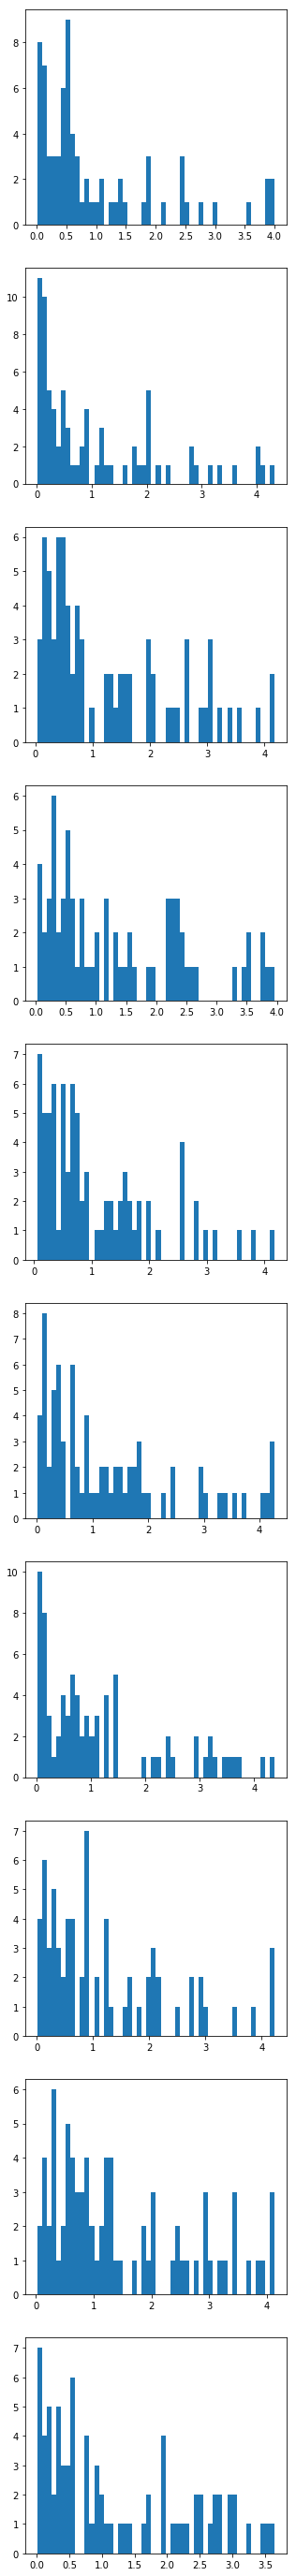

In [320]:
fig, ax = subplots(10, 1, figsize=(5, 50))
for i in range(10):
    ax[i].hist(diff[i],bins = 50)

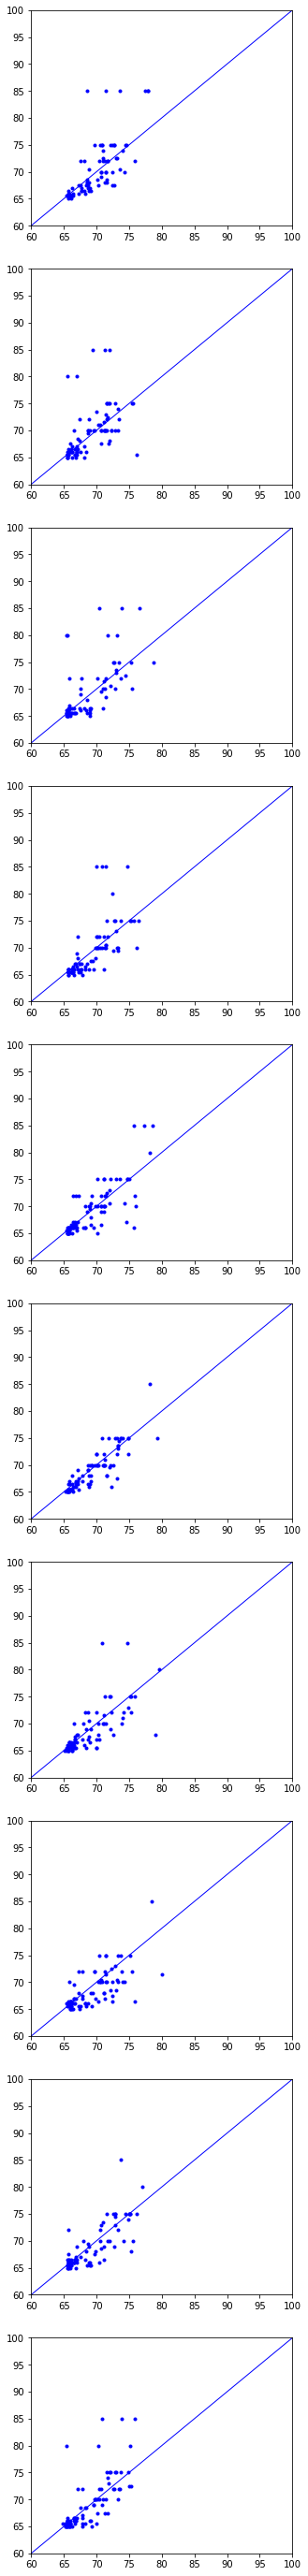

In [205]:
fig, ax = subplots(10, 1, figsize=(5, 50))
for i in range(10):
    ax[i].scatter(predict[i], test_label[i], marker = '.', color = 'b')
    ax[i].set_xlim(left=60, right=100)
    ax[i].set_ylim(bottom=60, top=100)
    line1 = [(60, 60), (100, 100)]
    (line1_xs, line1_ys) = zip(*line1)
    ax[i].add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

In [326]:
from sklearn.linear_model import Ridge
predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = Ridge(alpha = 1)
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

-0.655867477193
0.137835556252
-0.522274406894
-0.73153654305
0.00551139893039
-0.716307912599
0.148913360312
-1.79975581159
-0.762369681823
0.096443337278
average:-0.479941


In [191]:
from sklearn.kernel_ridge import KernelRidge
predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = KernelRidge(alpha = 10**(-1),kernel = 'polynomial',degree = 3)
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.88778010275e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.72895490984e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.63626078607e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWa

0.0535404258984
0.00159856148808
0.0578443782185
0.00100715822555


/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.69386644602e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0156538896e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4561533613e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarn

0.0877318720957
0.0991417256007
-0.0452104110917
0.020473688904
-0.00153187325912
0.0402929419118
average:0.031489


/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.01282035488e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.23957316879e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [192]:
from sklearn import neighbors

predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = neighbors.KNeighborsRegressor(n_neighbors=4)
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

-0.434814121342
-0.21328549607
-0.83440700413
0.216438865747
0.114893049774
0.439433347492
0.407764143156
0.430115543436
0.50176463705
-0.423011005142
average:0.020489


In [193]:
from sklearn.ensemble import RandomForestRegressor
predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None)
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

-0.286244701597
-0.877437029467
-0.433910166564
-0.0414109752774
0.569204731286
0.416181258893
0.321408795889
0.446539563708
0.512785158207
-0.159380899098
average:0.046774


In [115]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['all', 'sum', 'diff', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


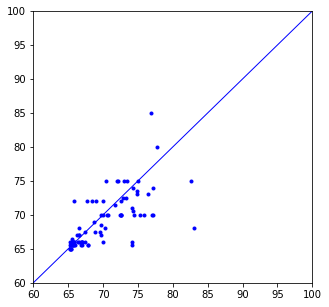

In [119]:
fig, ax = subplots(figsize=(5, 5))
ax.scatter(predict[1], test_label[1], marker = '.', color = 'b')
ax.set_xlim(left=60, right=100)
ax.set_ylim(bottom=60, top=100)
line1 = [(60, 60), (100, 100)]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

In [325]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))
predict = {}
r2 = {}
sum = 0
for i in range(10):
    reg = GaussianProcessRegressor()
    reg.fit(training_set[i],training_label[i])
    predict[i] = reg.predict(test_set[i])
    r2[i] = r2_score(predict[i],test_label[i])
    sum = sum + r2[i]
    print r2[i]
print 'average:%f' %(sum/10)

-7.23382998101
-6.29143068729
-5.47996762534
-6.43405738945
-8.37334740484
-5.56867362465
-3.19168060767
-8.15241169136
-8.22140436375
-5.33145026029
average:-6.427825
